In [56]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [57]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir + ' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count)+ ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [58]:
base_dir = 'Images/'
img_size = 180
batch = 32
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir, seed = 123, validation_split=0.2, subset ='training', batch_size=batch, image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir, seed = 123, validation_split=0.2, subset ='validation', batch_size=batch, image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [59]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [60]:
import matplotlib.pyplot as plt

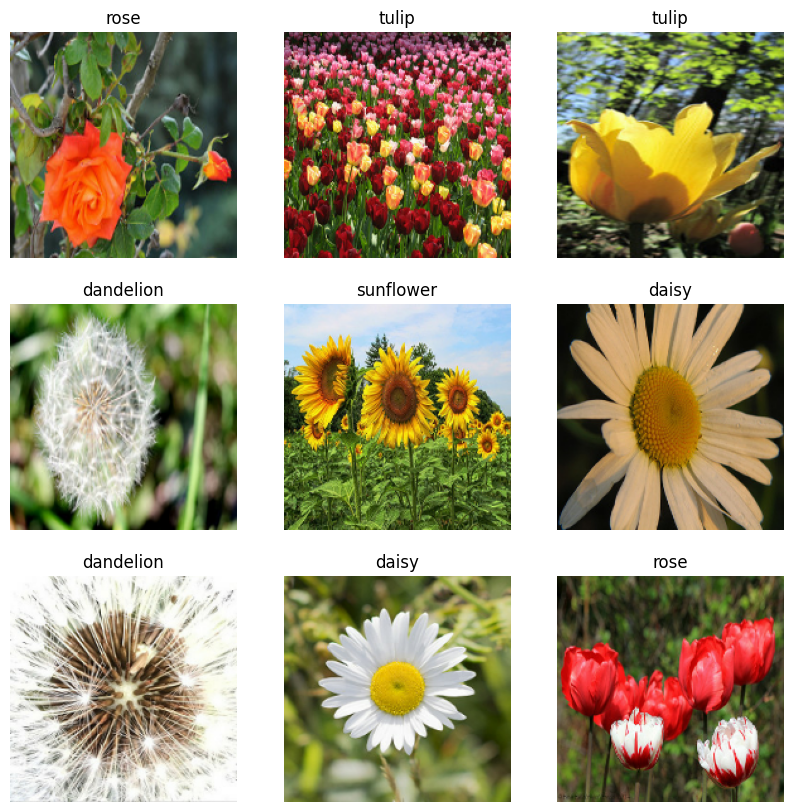

In [61]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [62]:
AUTOTUNE = tf.data.AUTOTUNE

In [63]:
#cache concept
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [64]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [65]:
#Data Augemtation

In [66]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\suraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


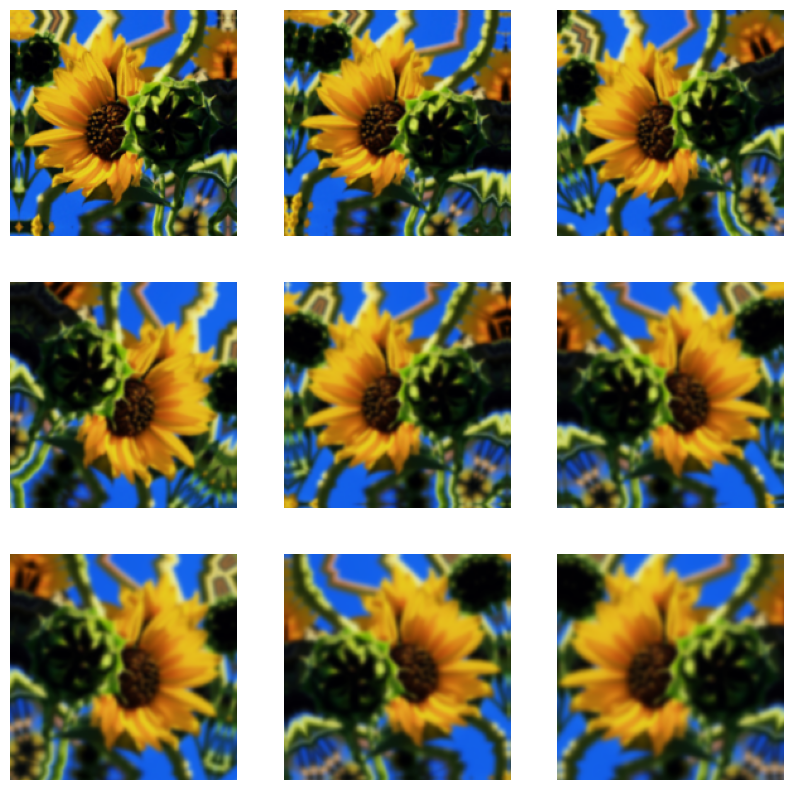

In [67]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [68]:
#Model Creation

In [69]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [70]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 289ms/step - accuracy: 0.3500 - loss: 1.5691 - val_accuracy: 0.4716 - val_loss: 1.2493
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 360ms/step - accuracy: 0.5573 - loss: 1.0814 - val_accuracy: 0.6072 - val_loss: 1.0056
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 345ms/step - accuracy: 0.6301 - loss: 0.9656 - val_accuracy: 0.6165 - val_loss: 0.9829
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 347ms/step - accuracy: 0.6387 - loss: 0.9174 - val_accuracy: 0.6327 - val_loss: 0.9621
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 357ms/step - accuracy: 0.6738 - loss: 0.8572 - val_accuracy: 0.6547 - val_loss: 0.9277
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 38s 351ms/step - accuracy: 0.6778 - loss: 0.8245 - val_accuracy: 0.6767 - val_loss: 0.8413
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 362ms/step - accuracy: 0.7079 - loss: 0.7773 - val_accuracy: 0.6767 - val_loss: 0.8680
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 369ms/step - accuracy: 0.7185 - loss: 0

In [73]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with accuracy of '+ str(np.max(result)*100)
    return outcome

In [75]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'The Image belongs to rose with a score of 72.087555'

In [76]:
model.save('Flower_Recog_Model.h5')